<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Rahul_kumar_soni_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [3]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [8]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [10]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [11]:
#viewing Data

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data cleaning

In [12]:
df['LIMIT_BAL'].max()

1000000

In [13]:
df['LIMIT_BAL'].min()

10000

In [14]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [15]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Looking for Outlier Using Isolation Forest

In [17]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [18]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [19]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [20]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1


In [21]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-0.047298,-1
59,400000,2,2,1,29,0,0,0,0,0,0,400134,398857,404205,360199,356656,364089,17000,15029,30000,12000,12000,23000,0,-0.018764,-1
102,480000,1,1,1,63,0,0,0,2,2,0,422069,431342,479432,487066,471145,469961,16078,55693,17000,0,18000,24200,0,-0.075574,-1
214,470000,1,2,2,27,2,2,2,2,0,0,296573,303320,307843,479978,305145,309959,13000,11001,0,10484,10838,10367,0,-0.025251,-1
360,500000,2,2,2,23,4,3,2,0,0,0,507726,509229,499936,505507,484612,419643,10000,0,14000,16500,16000,19000,1,-0.073183,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,0,474934,507062,491956,430637,376657,356636,40024,325,15296,12137,12312,14113,0,-0.042915,-1
29820,400000,1,2,2,37,1,-1,0,0,0,0,396343,394858,395716,385947,305542,271385,423903,15100,14600,13000,9500,9500,0,-0.053828,-1
29837,500000,1,1,2,34,0,0,0,0,0,0,494356,488578,488166,485249,441981,424592,17438,18852,16673,15244,15216,16037,0,-0.029139,-1
29883,420000,1,1,1,34,0,0,0,0,0,0,454391,466810,483277,479800,489200,489200,20000,24000,11000,10000,0,11000,0,-0.026219,-1


In [22]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [23]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# Exploratory Data Analysis and feature Engineering

In [24]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23152
1     6548
Name: Defaulters, dtype: int64

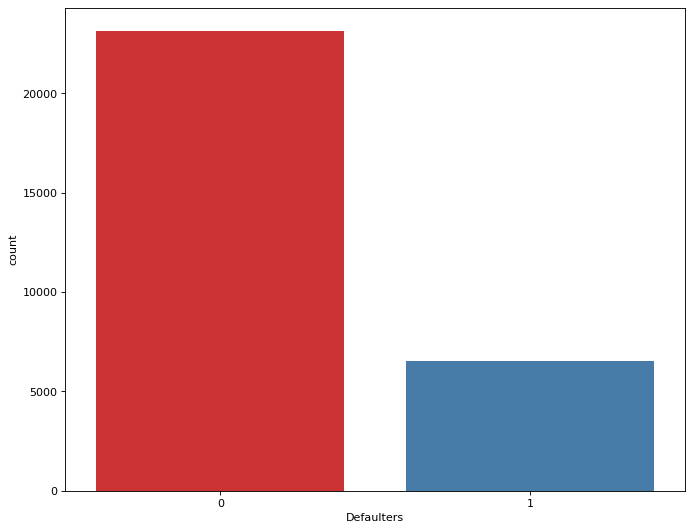

In [25]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [26]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [27]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [28]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [29]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [30]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17960
1    11740
Name: SEX, dtype: int64

count of EDUCATION features

2    13921
1    10437
3     4886
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15837
1    13487
3      322
0       54
Name: MARRIAGE, dtype: int64



In [31]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [32]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


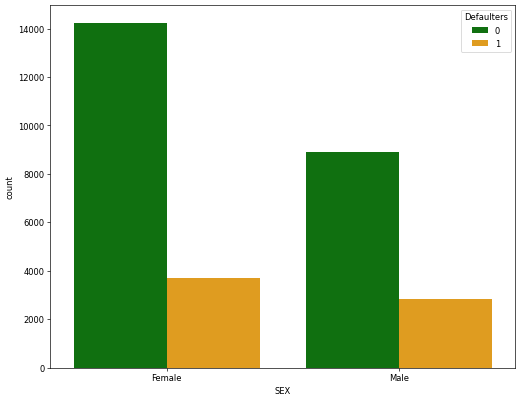

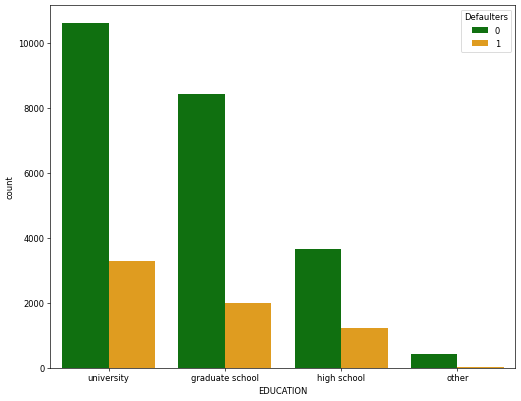

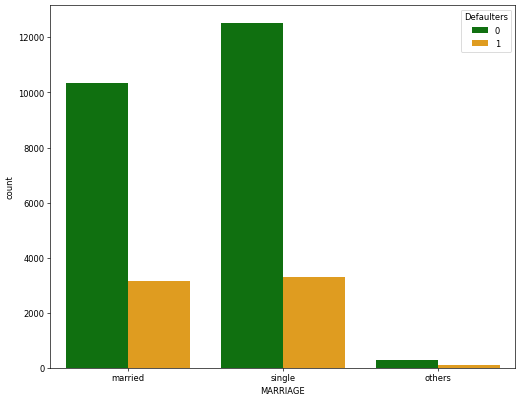

In [33]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [34]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17960
Male      11740
Name: SEX, dtype: int64

count of EDUCATION features

university         13921
graduate school    10437
high school         4886
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15837
married    13487
others       376
Name: MARRIAGE, dtype: int64



In [35]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [36]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [37]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207071
1    Male   0.240971
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251535
2            other   0.070175
3       university   0.236046
  MARRIAGE  Defaulter
0  married   0.233929
1   others   0.236702
2   single   0.208625


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [38]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435892
std          9.199220
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [39]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [40]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [41]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1,31-40
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1,51-60


In [42]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10963
31-40         10604
41-50          5909
51-60          1966
60 & above      258
Name: age_group, dtype: int64

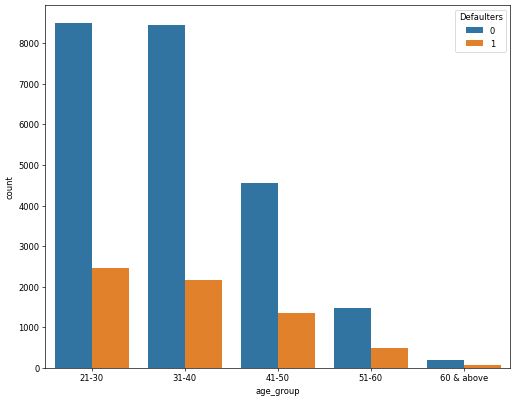

In [43]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [44]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224209
1,31-40,0.203697
2,41-50,0.230496
3,51-60,0.252798
4,60 & above,0.275194


### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [45]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [46]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1,51-60


In [47]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023030,-0.140337,-0.172290,-0.226162,-0.271414,-0.296397
std,1.113999,1.189467,1.192355,1.166583,1.132032,1.149251
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [48]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5359.661818,5.408550e+03,4903.847407,4598.541246,4553.933872,4823.623670
std,14282.084238,1.620293e+04,14757.256529,14558.191350,14114.856319,15656.614427
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.150000e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [49]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48175.440943,46158.394949,43866.258485,40254.475791,37495.571347,36253.206431
std,65622.377293,62924.272430,60393.851965,55940.313243,52710.101639,52060.625452
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3458.750000,2899.000000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21708.500000,20650.000000,19779.500000,18783.000000,17860.000000,16699.000000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48276.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


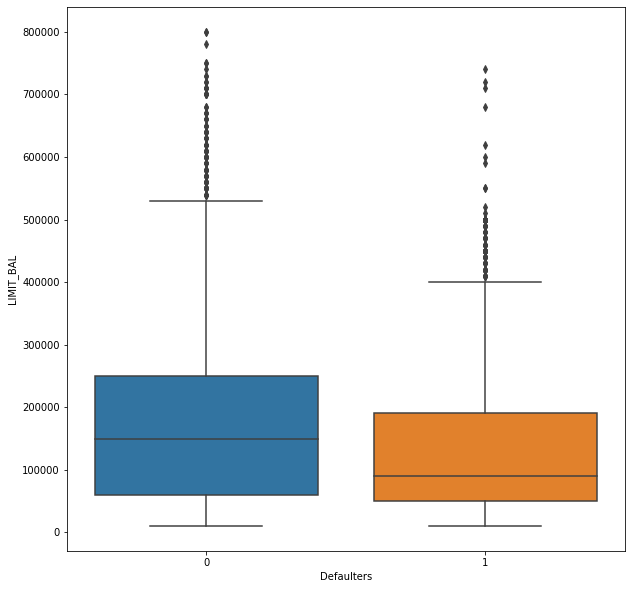

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

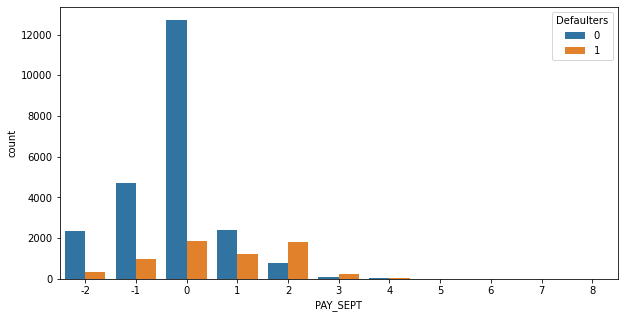

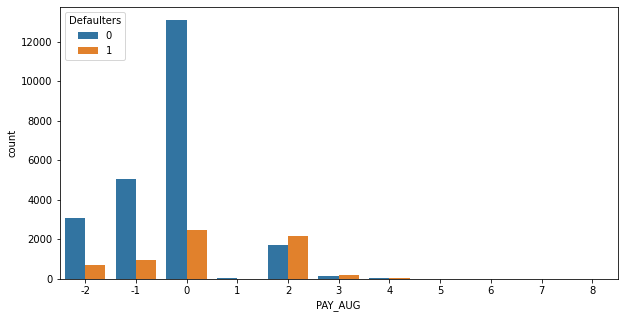

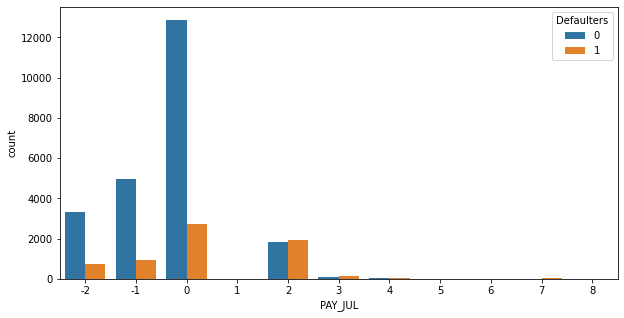

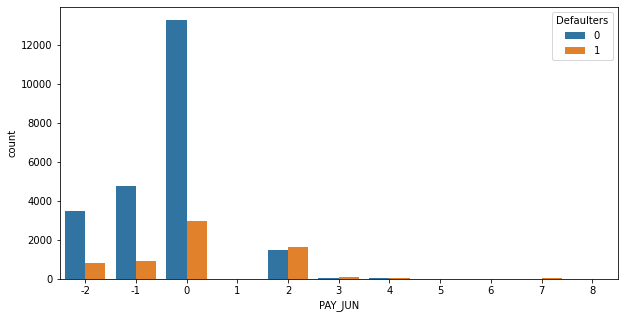

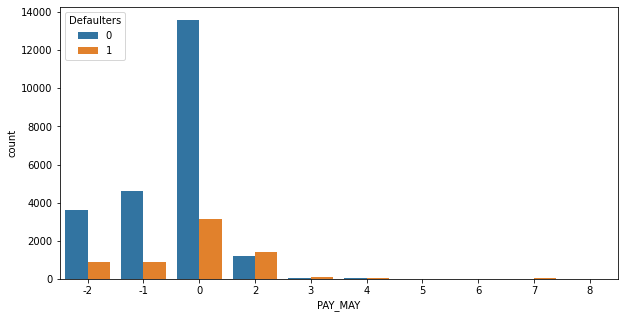

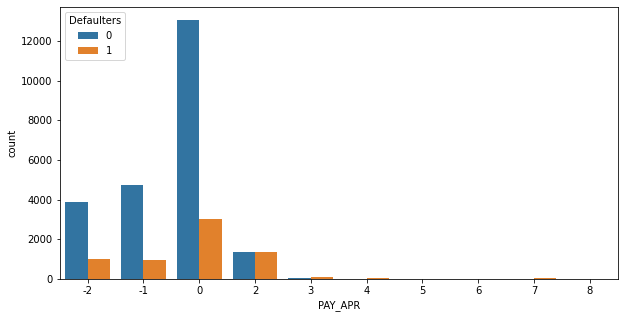

In [51]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [52]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [53]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [54]:
#looking into independent variable
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [55]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [56]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [57]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [58]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [59]:
#spliting Dependent variable
y=df['Defaulters']

In [60]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46304


In [61]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23152],
       [    1, 23152]])

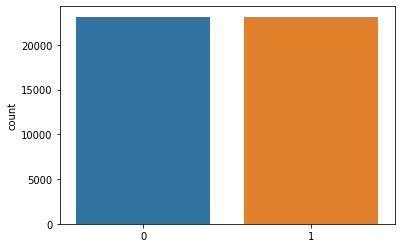

In [62]:
sns.countplot(y_smote)

## Train | Test Split

In [63]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [64]:
#looking into independent variable of train dataset
X_train

array([[ 50000,      0,     -1, ...,      0,      1,      0],
       [177960,      0,      0, ...,      0,      0,      0],
       [ 10000,      0,      0, ...,      0,      0,      0],
       ...,
       [190000,      0,      0, ...,      0,      0,      0],
       [ 20000,      1,     -1, ...,      0,      0,      0],
       [ 30000,      0,      0, ...,      0,      0,      0]])

In [65]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [66]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [67]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


# creating function to get feature importance 

In [68]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [69]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [70]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [71]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.011min 

score matrix for train
********************************************************************************
The accuracy is  0.8665917991246257
The precision is  0.9547180626209071
The recall is  0.7690753780445573
The f1 is  0.8519003931847969
the auc  is  0.8663788567041544

confusion_matrix 
  [[16770   632]
 [ 4001 13325]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8645473393227368
The precision is  0.9537510656436488
The recall is  0.7681084792310333
The f1 is  0.8509222285605629
the auc  is  0.8651846743981253

confusion_matrix 
  [[5

### implementing GridSearch for Hyperparameter Tuning

In [72]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [73]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [74]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    7.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.8s finished


Training time: 0.1366min 

score matrix for train
********************************************************************************
The accuracy is  0.866994932043308
The precision is  0.9508906394152296
The recall is  0.7733464157912964
The f1 is  0.8529776872393926
the auc  is  0.8667904358004868

confusion_matrix 
  [[16710   692]
 [ 3927 13399]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8648928818244644
The precision is  0.9493884436946436
The recall is  0.7727428767593546
The f1 is  0.852006056018168
the auc  is  0.865501873162286

confusion_matrix 
  [[551

In [75]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-0.05702864,  0.57765691,  0.1130403 ,  0.04382395,  0.05025776,
         0.04524003,  0.01961687, -0.25435985,  0.03128967,  0.05472507,
         0.03888137, -0.03740646,  0.02356228, -0.13685974, -0.1919008 ,
        -0.06885819, -0.03992534, -0.06174278, -0.05246144, -1.25176676,
        -1.13175866, -1.13589706, -0.89814526, -0.37438399, -1.28710407,
        -1.07792277, -0.22544127, -1.18868029, -1.28834713, -1.26064868,
        -0.98281041, -0.58615526, -0.20954934]])

In [76]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [77]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [78]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [79]:
imp_feat

,Features,Importance
28,age_group_21-30,1.288347
24,EDUCATION_university,1.287104
29,age_group_31-40,1.260649
19,SEX_Female,1.251767
27,MARRIAGE_single,1.188680
21,EDUCATION_graduate school,1.135897
20,SEX_Male,1.131759
25,MARRIAGE_married,1.077923
30,age_group_41-50,0.982810
22,EDUCATION_high school,0.898145


==========================Features Importance============================

 [[-0.05702864  0.57765691  0.1130403   0.04382395  0.05025776  0.04524003
   0.01961687 -0.25435985  0.03128967  0.05472507  0.03888137 -0.03740646
   0.02356228 -0.13685974 -0.1919008  -0.06885819 -0.03992534 -0.06174278
  -0.05246144 -1.25176676 -1.13175866 -1.13589706 -0.89814526 -0.37438399
  -1.28710407 -1.07792277 -0.22544127 -1.18868029 -1.28834713 -1.26064868
  -0.98281041 -0.58615526 -0.20954934]]



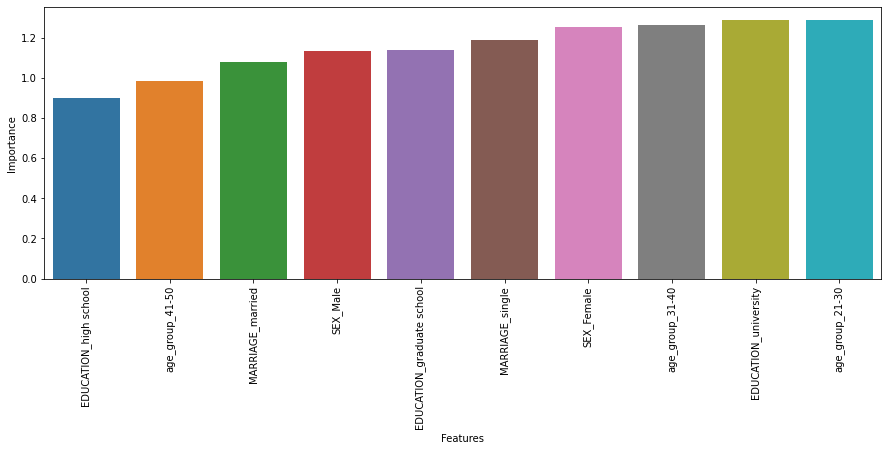

In [80]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [81]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [82]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0095min 

score matrix for train
********************************************************************************
The accuracy is  0.8262497120479152
The precision is  0.8994057724957555
The recall is  0.7338104582708069
The f1 is  0.8082130824486683
the auc  is  0.8260478564196237

confusion_matrix 
  [[15980  1422]
 [ 4612 12714]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     17402
           1       0.90      0.73      0.81     17326

    accuracy                           0.83     34728
   macro avg       0.84      0.83      0.82     34728
weighted avg       0.84      0.83      0.82     34728



score matrix for test
********************************************************************************
The accuracy is  0.8247235659986178
The precision is  0.8974251622357128
The recall is  0.7358393408856848
The f1 is  0.8086390644157314
the auc  is  0.8253109747906686

confusion_matrix 
  [[

In [83]:
DecisionTree.feature_importances_

array([0.00522546, 0.23836098, 0.09440853, 0.        , 0.00225985,
       0.        , 0.01808267, 0.00325708, 0.00692377, 0.        ,
       0.        , 0.00685456, 0.        , 0.00284986, 0.02004173,
       0.        , 0.        , 0.        , 0.        , 0.05424088,
       0.27224458, 0.0140858 , 0.03597941, 0.0275026 , 0.01855854,
       0.10609746, 0.03376429, 0.01953293, 0.00462405, 0.0029087 ,
       0.00719646, 0.00499978, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



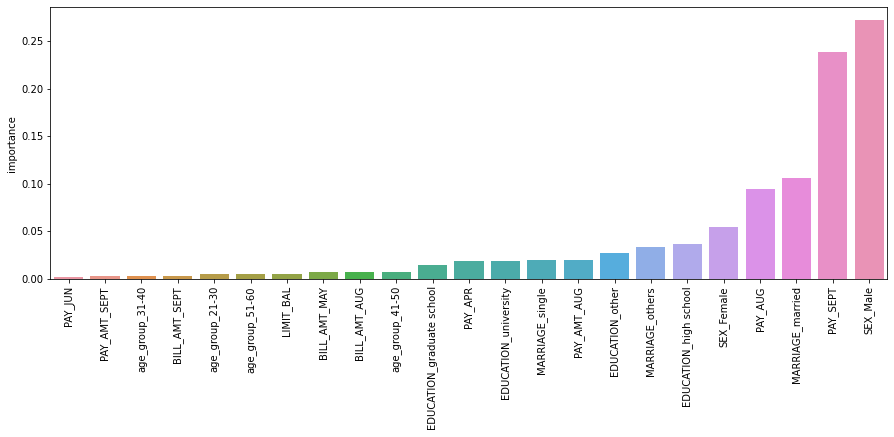

In [84]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [85]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [86]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1397min 

score matrix for train
********************************************************************************
The accuracy is  0.9982434922828841
The precision is  0.998556165174704
The recall is  0.9979221978529378
The f1 is  0.9982390808579429
the auc  is  0.9982427906860368

confusion_matrix 
  [[17377    25]
 [   36 17290]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17402
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     34728
   macro avg       1.00      1.00      1.00     34728
weighted avg       1.00      1.00      1.00     34728



score matrix for test
********************************************************************************
The accuracy is  0.8757774706288873
The precision is  0.9043494286767416
The recall is  0.8422588396841744
The f1 is  0.8722004976892997
the auc  is  0.8759989850594785

confusion_matrix 
  [[5

### implementing gridsearch for hyperparameter tuning in Random Forest

In [87]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [88]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.8min finished


Training time: 5.0766min 

score matrix for train
********************************************************************************
The accuracy is  0.8684346924671734
The precision is  0.911171275704248
The recall is  0.8158259263534572
The f1 is  0.8608666524559213
the auc  is  0.8683198129641094

confusion_matrix 
  [[16024  1378]
 [ 3191 14135]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.92      0.88     17402
           1       0.91      0.82      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.87      0.87      0.87     34728
weighted avg       0.87      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8532308223911541
The precision is  0.8923749762312226
The recall is  0.8055269481634054
The f1 is  0.8467298150654036
the auc  is  0.8535460827773549

confusion_matrix 
  [[5

In [89]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 250}

In [90]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



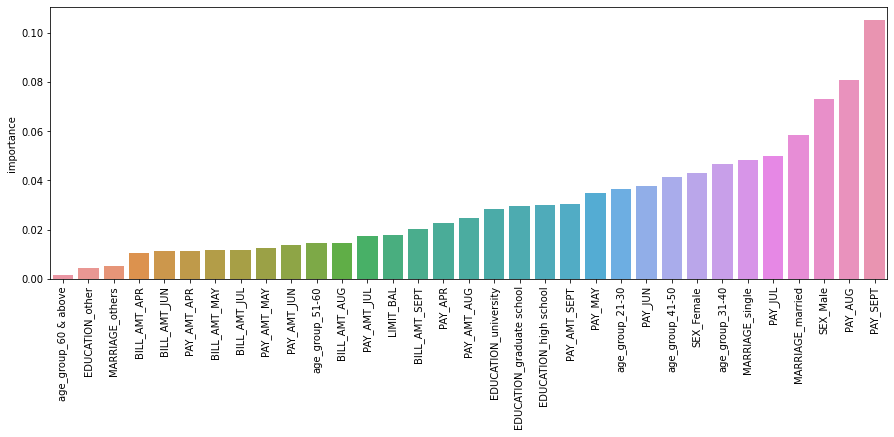

In [92]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [93]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [94]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.0301min 

score matrix for train
********************************************************************************
The accuracy is  0.8759502418797512
The precision is  0.9459440942724034
The recall is  0.7968948401246682
The f1 is  0.8650460497462565
the auc  is  0.8757776119942958

confusion_matrix 
  [[16613   789]
 [ 3519 13807]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17402
           1       0.95      0.80      0.87     17326

    accuracy                           0.88     34728
   macro avg       0.89      0.88      0.88     34728
weighted avg       0.89      0.88      0.88     34728



score matrix for test
********************************************************************************
The accuracy is  0.8694713199723566
The precision is  0.9438387163135158
The recall is  0.7875042911088225
The f1 is  0.8586132684570038
the auc  is  0.8700130151196287

confusion_matrix 
  [[

### Hyperparameter tuning for SVM

In [95]:
params={'C':[0.01,0.1,1],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [96]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 13.465min 

score matrix for train
********************************************************************************
The accuracy is  0.8759502418797512
The precision is  0.9459440942724034
The recall is  0.7968948401246682
The f1 is  0.8650460497462565
the auc  is  0.8757776119942958

confusion_matrix 
  [[16613   789]
 [ 3519 13807]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17402
           1       0.95      0.80      0.87     17326

    accuracy                           0.88     34728
   macro avg       0.89      0.88      0.88     34728
weighted avg       0.89      0.88      0.88     34728



score matrix for test
********************************************************************************
The accuracy is  0.8694713199723566
The precision is  0.9438387163135158
The recall is  0.7875042911088225
The f1 is  0.8586132684570038
the auc  is  0.8700130151196287

confusion_matrix 
  [[

In [97]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 1, 'kernel': 'rbf'}

---
#XGboost
---

In [99]:
from xgboost import XGBClassifier

In [100]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [101]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0781min 

score matrix for train
********************************************************************************
The accuracy is  0.873416263533748
The precision is  0.9284862142099682
The recall is  0.8085536188387394
The f1 is  0.8643795890664528
the auc  is  0.8732746257623187

confusion_matrix 
  [[16323  1079]
 [ 3317 14009]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17402
           1       0.93      0.81      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8697304768486523
The precision is  0.9234994115339349
The recall is  0.8081016134569172
The f1 is  0.8619553277187844
the auc  is  0.8701377632501978

confusion_matrix 
  [[5

### Hyperparameter tuning for Xgboost

In [102]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [103]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.4min finished


Training time: 4.7438min 

score matrix for train
********************************************************************************
The accuracy is  0.9501554941257775
The precision is  0.9893316598682146
The recall is  0.9099041902343299
The f1 is  0.947957066835032
the auc  is  0.9500675990822265

confusion_matrix 
  [[17232   170]
 [ 1561 15765]]

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17402
           1       0.99      0.91      0.95     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8777643400138218
The precision is  0.9290021396615444
The recall is  0.819773429454171
The f1 is  0.8709765660618218
the auc  is  0.8781475842923029

confusion_matrix 
  [[53

In [104]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [105]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



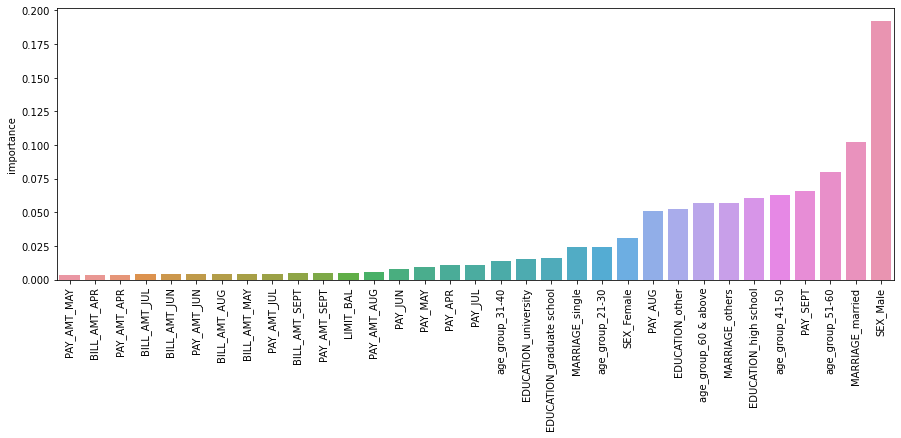

In [106]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [107]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 27 kB/s 


In [108]:
from catboost import CatBoostClassifier

In [109]:
cb_model=CatBoostClassifier(verbose=0)

In [110]:
cb_model=CatBoostClassifier()

In [111]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.04686
0:	learn: 0.6497786	total: 63.3ms	remaining: 1m 3s
1:	learn: 0.6187235	total: 76.5ms	remaining: 38.2s
2:	learn: 0.5995705	total: 89.6ms	remaining: 29.8s
3:	learn: 0.5755504	total: 102ms	remaining: 25.4s
4:	learn: 0.5541608	total: 115ms	remaining: 22.8s
5:	learn: 0.5403043	total: 128ms	remaining: 21.2s
6:	learn: 0.5225887	total: 140ms	remaining: 19.9s
7:	learn: 0.5116689	total: 154ms	remaining: 19.1s
8:	learn: 0.4915537	total: 166ms	remaining: 18.3s
9:	learn: 0.4825958	total: 179ms	remaining: 17.8s
10:	learn: 0.4744184	total: 195ms	remaining: 17.6s
11:	learn: 0.4623154	total: 209ms	remaining: 17.2s
12:	learn: 0.4520250	total: 221ms	remaining: 16.8s
13:	learn: 0.4481420	total: 234ms	remaining: 16.4s
14:	learn: 0.4425628	total: 248ms	remaining: 16.3s
15:	learn: 0.4334162	total: 261ms	remaining: 16.1s
16:	learn: 0.4300307	total: 274ms	remaining: 15.8s
17:	learn: 0.4226780	total: 287ms	remaining: 15.7s
18:	learn: 0.4157288	total: 301ms	remaining: 15.5s
19:	learn

### Hyperparameter tuning for Catboost

In [112]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [113]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.266888
0:	learn: 0.5208491	total: 48.9ms	remaining: 7.28s
1:	learn: 0.4444134	total: 87.5ms	remaining: 6.47s
2:	learn: 0.3937523	total: 126ms	remaining: 6.19s
3:	learn: 0.3570373	total: 163ms	remaining: 5.96s
4:	learn: 0.3387018	total: 207ms	remaining: 6.01s
5:	learn: 0.3326020	total: 244ms	remaining: 5.85s
6:	learn: 0.3250790	total: 286ms	remaining: 5.83s
7:	learn: 0.3159386	total: 325ms	remaining: 5.77s
8:	learn: 0.3032998	total: 361ms	remaining: 5.66s
9:	learn: 0.3007361	total: 400ms	remaining: 5.6s
10:	learn: 0.2977829	total: 449ms	remaining: 5.67s
11:	learn: 0.2964994	total: 485ms	remaining: 5.58s
12:	learn: 0.2943336	total: 523ms	remaining: 5.51s
13:	learn: 0.2916738	total: 563ms	remaining: 5.47s
14:	learn: 0.2895963	total: 603ms	remaining: 5.43s
15:	learn: 0.2880315	total: 645ms	remaining: 5.4s
16:	learn: 0.2865234	total: 689ms	remaining: 5.39s
17:	learn: 0.2853365	total: 728ms	remaining: 5.34s
18:	learn: 0.2841479	total: 766ms	remaining: 5.28s
19:	learn: 

In [114]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [115]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([ 2.33735271,  2.62749668,  1.20006658,  0.81747838,  0.34723417,
        0.57094803,  0.47689851,  1.61677611,  1.02209033,  0.75655922,
        0.99575502,  0.79889949,  0.87846408,  1.7558968 ,  1.55976198,
        1.32790428,  1.49754665,  1.36644216,  1.90437454,  6.64672434,
        5.86336778,  9.59099446,  7.24015485,  1.51472363, 11.03727028,
        4.7271952 ,  0.40601163,  5.33471656,  8.12908095,  7.42060032,
        5.47086546,  2.41102109,  0.34932774])

==========================Features Importance============================




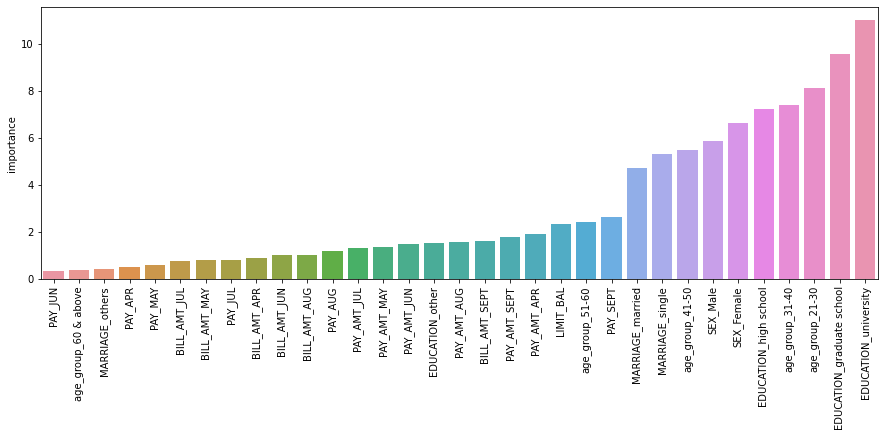

In [116]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [117]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 150}

# Model's Score matrix

In [118]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [119]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost']

In [120]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [121]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [122]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.864547,0.953751,0.768108,0.850922,0.865185
1,grid_log_regg,0.864893,0.949388,0.772743,0.852006,0.865502
2,Desision Tree,0.824724,0.897425,0.735839,0.808639,0.825311
3,Random forest,0.875777,0.904349,0.842259,0.872200,0.875999
4,grid random forest,0.853231,0.892375,0.805527,0.846730,0.853546
5,SVM,0.869471,0.943839,0.787504,0.858613,0.870013
6,Grid SVM,0.869471,0.943839,0.787504,0.858613,0.870013
7,XGboost,0.869730,0.923499,0.808102,0.861955,0.870138
8,Grid Xgboost,0.877764,0.929002,0.819773,0.870977,0.878148
9,CATBoost,0.873704,0.929021,0.811020,0.866019,0.874118


# ROC curve for all the models
---

In [136]:
log_reg_best=grid_log_model.best_estimator_
rfc_best=grid_rfc_model.best_estimator_
xgbc_best=grid_xgboost_model.best_estimator_
cat_best=grid_cb_model.best_estimator_



In [138]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]


In [139]:
from sklearn.metrics import roc_curve

In [140]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

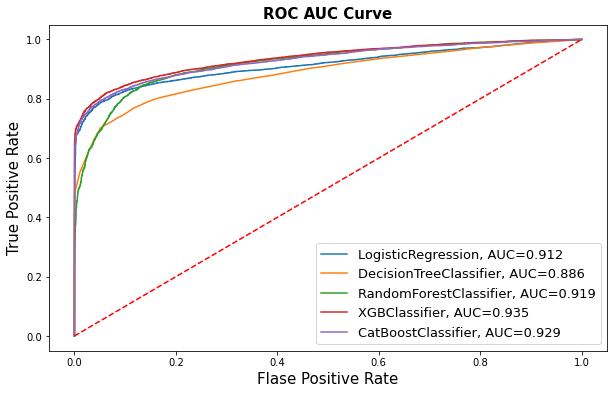

In [141]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()